# Atividade_MD_4

### Carlos Miguel Toste Sisto nºUSP: 9847561

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exercício 1

Primeiramente vamos ler a base de dados:

In [6]:
data = pd.read_csv('words_data.csv', header = None, index_col= 0)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,,,,,,,,,,,,,,,,,,,,,
car,0.130859,0.008423,0.033447,-0.058838,0.040039,-0.142578,0.049316,-0.168945,0.208984,0.119629,...,-0.275391,0.285156,-0.047363,0.064941,-0.112305,-0.025757,-0.041260,0.228516,-0.149414,-0.150391
bus,0.059326,-0.169922,0.038818,-0.049561,0.038330,-0.153320,-0.166016,-0.443359,0.239258,0.011780,...,-0.011108,0.079590,0.130859,-0.211914,0.073730,0.081055,-0.158203,0.474609,0.059814,-0.244141
drive,-0.025879,0.097656,0.008972,-0.097656,-0.122070,-0.103516,0.030762,-0.167969,-0.006622,0.287109,...,-0.011780,0.380859,-0.181641,0.257812,0.113281,-0.069336,-0.016479,-0.025635,-0.076172,-0.127930
road,0.111816,0.263672,0.085938,-0.083984,0.146484,-0.031738,-0.194336,-0.261719,-0.000030,0.177734,...,-0.050781,0.035156,-0.292969,0.000927,0.032227,-0.038818,-0.110840,-0.067383,0.230469,-0.231445
devil,0.287109,-0.186523,0.161133,0.182617,-0.174805,0.367188,-0.018677,-0.026978,0.125977,0.233398,...,-0.005371,-0.064941,-0.093262,-0.104980,-0.414062,0.026123,0.337891,-0.033203,-0.195312,0.028687


Podemos notar que a base está estruturada considerando cada palavra como uma observação na base de dados e que possui 300 atributos que modelam esta palavra no espaço vetorial.

# Exercício 2

In [7]:
from sklearn.cluster import KMeans

A seguir criamos a instância do K-Means com K = 3 e agrupamos os dados:

In [8]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

# Exercício 3

Agora criaremos uma coluna de rótulos em nosso banco de dados obtida a partir do método de agrupamento utilizado:

In [36]:
data['Rótulo']  = kmeans.fit_predict(data)

Agora, serão mostradas quais palavras estão em cada cluster, a partir da coluna 'Rótulo' criada anteriormente:

In [29]:
cluster_0 = data[data['Rótulo']==0].index
print(cluster_0)

Index(['devil', 'hell', 'dead', 'dark'], dtype='object', name=0)


In [30]:
cluster_1 = data[data['Rótulo']==1].index
print(cluster_1)

Index(['golf', 'sports', 'racing', 'soccer', 'game', 'rugby'], dtype='object', name=0)


In [32]:
cluster_2 = data[data['Rótulo']==2].index
print(cluster_2)

Index(['car', 'bus', 'drive', 'road', 'fire', 'circuit'], dtype='object', name=0)


Observando o resultado dos agrupamentos, percebemos que as palavras que ficaram juntas possuem uma certa correlação de contexto.
No cluster 0, percebemos que as palavras estão relacionadas a coisas que geralmente são consideradas ruins pelas pessoas.
No cluster 1, as palavras estão relacionadas a esportes e lazer.
No cluster 3, as palavras se relacionam ao mundo automobilístico e de transportes.
Sendo assim, este agrupamento faz sentido.

# Exercício 4

Utilizaremos agora o método de agrupamento hierárquico para agrupar os dados.
Para isso, precisamos excluir a coluna 'Rótulo',criada anteriormente, de nossa base de dados.

In [37]:
data = data.drop('Rótulo', axis = 1)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,,,,,,,,,,,,,,,,,,,,,
car,0.130859,0.008423,0.033447,-0.058838,0.040039,-0.142578,0.049316,-0.168945,0.208984,0.119629,...,-0.275391,0.285156,-0.047363,0.064941,-0.112305,-0.025757,-0.041260,0.228516,-0.149414,-0.150391
bus,0.059326,-0.169922,0.038818,-0.049561,0.038330,-0.153320,-0.166016,-0.443359,0.239258,0.011780,...,-0.011108,0.079590,0.130859,-0.211914,0.073730,0.081055,-0.158203,0.474609,0.059814,-0.244141
drive,-0.025879,0.097656,0.008972,-0.097656,-0.122070,-0.103516,0.030762,-0.167969,-0.006622,0.287109,...,-0.011780,0.380859,-0.181641,0.257812,0.113281,-0.069336,-0.016479,-0.025635,-0.076172,-0.127930
road,0.111816,0.263672,0.085938,-0.083984,0.146484,-0.031738,-0.194336,-0.261719,-0.000030,0.177734,...,-0.050781,0.035156,-0.292969,0.000927,0.032227,-0.038818,-0.110840,-0.067383,0.230469,-0.231445
devil,0.287109,-0.186523,0.161133,0.182617,-0.174805,0.367188,-0.018677,-0.026978,0.125977,0.233398,...,-0.005371,-0.064941,-0.093262,-0.104980,-0.414062,0.026123,0.337891,-0.033203,-0.195312,0.028687


A seguir, realizamos o agrupamento via clusterização hirárquica, através de ligações completas:

In [38]:
from scipy.cluster.hierarchy import linkage

In [76]:
hierarchy = linkage(data, method = 'single')

# Exercício 5

O código a seguir constrói e nos mostra o dendograma resultante:

In [41]:
from scipy.cluster.hierarchy import dendrogram

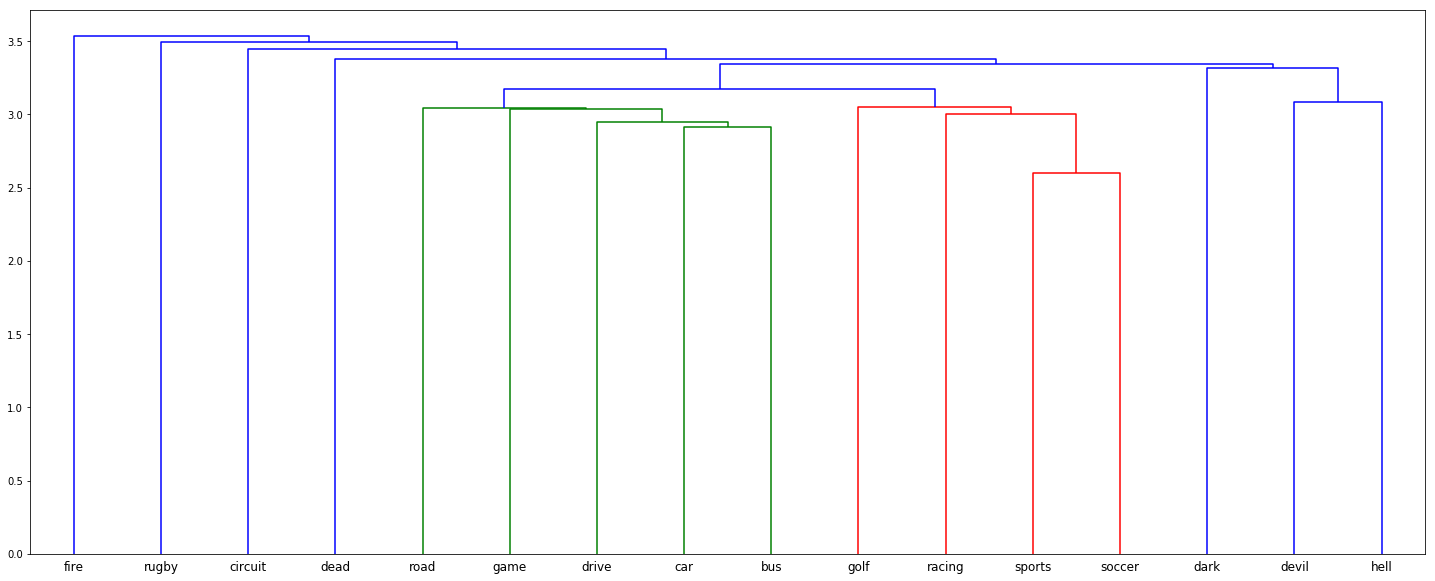

In [77]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(hierarchy, labels = data.index, color_threshold = 3.085)
plt.show()

Considerando 3 grupos, vemos que o grupo em azul possui palavras utilizadas em contexto parecido como 'dead' e 'dark', porém apresenta algumas 'intrusas' como 'rugby',

O grupo em verde possui palavras relacionadas ao mundo dos automóveis, mas a palavra 'game' parece estar fora de contexto.

No grupo em vermelho, as palavras possuem contexto esportivo, não havendo palavras fora de suas características.